# Simulación de variables aleatorias y teoremas de aproximación.

$\mathbf{Teorema}.-$ Sea $X$ una variable aleatoria real. Supongamos que su función de rapartición $F$ es estrictamente creciente (por lo que $F$ es una biyección de $\mathbb{R}$ sobre $(0,1)$ y podemos denotar por $F^{-1}$ a su inversa). Sea $U\sim \text{unif}[0,1]$. Entonces $F^{-1}(U)$ tiene la misma ley que $X$.

Si $F$ no es estrictamente creciente, hemos visto que el teorema precedente sigue siendo válido bajo la condición de definir 
$$F^{-1}(u)=\inf\{ x\in \mathbb{R} : F(u)\geq u\},$$
la inversa generalizada de $F$.

$\mathbf{Ejemplo}$ (Variable aleatoria Cauchy) Simulemos la variable aleatoria de Cauchy de parámetro $1$ que tiene por función de densidad 
$$\frac{1}{\pi}\frac{1}{1+x^{2}}.$$

Ejercicio: Ver que la función así definida es una función de densidad de probabilidad y crear una gráfica en Python que muestre su forma.

Por el teorema anterior, para $u\in (0,1)$
$$u=\frac{1}{\pi}\arctan(x)+\frac{1}{2} \qquad \text{si y sólo si} \qquad x=\tan\left({\pi}\left(u-\frac{1}{2} \right) \right).$$

$\mathbf{Implementar \ un \ código \ para \ simular \ una \ variable \ aleatoria \ Cauchy}$

In [1]:
from math import *
import numpy.random as npr

def Cauchy():
    U=npr.rand() 
    return tan(pi*(U-1/2))
    
print(Cauchy()) 

-0.01729157023223721


## Aproximación Bernoulli a Poisson

$\textbf{Teorema (Poisson).-}$ Sean $S_{n}\sim Bin(n,p_{n})$ bajo el regimen $$\lim_{n\to \infty}np_{n}=\theta>0.$$
Consideremos la siguiente sucesión de números reales:
    $$a_{j}(n,p_n)=\begin{cases}\binom{n}{j}(p_n)^{j}(1-p_{n})^{n-j} & j\leq n\\
    0 & j\geq n+1\end{cases}.$$
 Entonces, 
 $$\lim_{n\to \infty}a_{j}(n,p_n)=a_{j}=e^{-\theta}\frac{\theta^{j}}{j!} \ \ \forall j\in \mathbb{N}.$$
 
 Simulemos el teorema de Poisson.

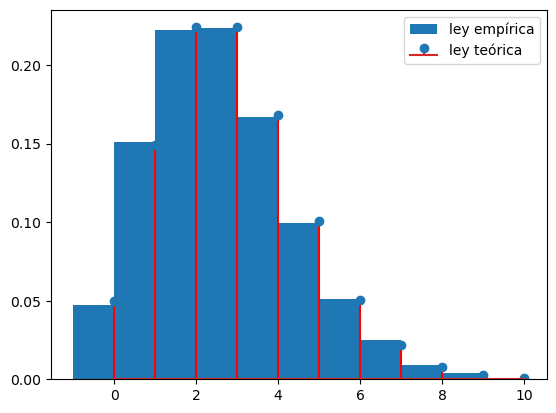

In [2]:
from __future__ import division
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

param=3 
n=1000
N=5000 

X=npr.binomial(n,param/n,N)

counts = np.bincount(X) / float(N)
x = np.arange(len(counts))
f_x = sps.poisson.pmf(x, param)
plt.close()
plt.bar(x - 0.5, counts, width=1., label="ley empírica")
p2 = plt.stem(x, f_x, "r", label="ley teórica")
plt.legend()
plt.show()

# Variables aleatorias geométrica y exponencial

A través del teorema de simulación, es posible generar una variable aleatoria exponencial.

Sea $\lambda>0$ y $U\sim \text{unif}[0,1]$. Entonces, la variable aleatoria
$$X=-\frac{\ln(U)}{\lambda}\sim \exp(\lambda).$$

$\mathbf{Definición.-}$ Una variable aleatoria $X$ sigue una ley exponencial de parámetro $\lambda>0$: $X(\Omega)=\mathbb{R}_{+}$ y $\mathbb{P}_{X}$ admite la ley de densidad
$$f(x)=\lambda e^{-\lambda x}\mathbf{1}_{\{x>0\}}$$

Una variable aleatoria exponencial modela varios fenómenos que ocurren en la naturaleza; en particular aquellos que cuentan la duración de vida de una partícula o tiempo de espera entre eventos específicos:
- duración de vida de una bacteria,
- duración de una conversación telefónica,
- tiempo entre terremotos.

$\textbf{Propiedad de pérdida de memoria:}$
$$\mathbb{P}(X>t+s \mid X>t)=\mathbb{P}(X>s)=e^{-\lambda s}.$$

Ejercicio: Demostrar la propiedad de pérdida de memoria para $X\sim \exp(\lambda)$.

Ejemplo: hipótesis natural para modelar las duraciones de vida de átomos radioactivas (Rutherford y Soddy). Cada átomo radioactivo posee una duración de vida que sigue una ley exponencial. En este campo, el parámetro $\lambda$ se llama la constante de desintegración.

 Si $t\mapsto \rho(t)=\mathbb{P}(X>t)$ verifica
$$\rho(t+s)=\rho(t)\rho(s),$$
de manera que (derivando en $s$, con $s=0$),
$$\rho^{\prime}(t)=-\rho(t)\lambda \qquad \ \lambda=-\rho^{\prime}(0)\geq 0.$$
Así,
$$\rho(t)=e^{-\lambda t} \qquad \text{y} \qquad f(t)=\lambda e^{-\lambda t} \ \  \rho(0)=1.$$

## Relación ley geométrica-ley exponencial

$\mathbf{Teorema.-}$ Sea $\varepsilon>0$ y $Y_{\epsilon}\sim Geo(p_{\varepsilon})$. Supongamos que nos encontramos en el regimen:
    $$\lim_{\varepsilon\to 0}p_{\varepsilon}=0 \qquad \text{y} \qquad \varepsilon^{-1}p_{\varepsilon}\sim \lambda>0$$
   Sea $X_{\varepsilon}:=\varepsilon Y_{\varepsilon}$. Entonces,
   $$\lim_{\varepsilon\to 0}F_{X_{\varepsilon}}(x)=F_{X}(x),$$
   en donde $X\sim \exp(\lambda)$. Este también es un resultado de convergencia en ley.

Realicemos un programa que visualice al teorema precedente.

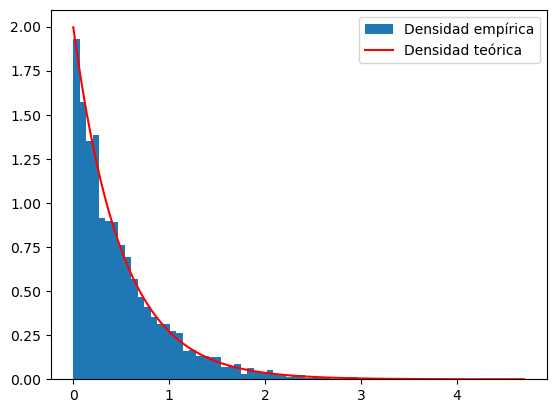

In [3]:
from __future__ import division
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt


param=2 
n=1000
N=5000 

X=npr.geometric(param/n,N)

plt.close()
plt.hist(X/n, density=True, label="Densidad empírica", bins=int(sqrt(N)))
x = np.linspace(min(X/n), max(X/n), 100) 
f_x =  param*np.exp(-param*x)
plt.plot(x, f_x, "r", label="Densidad teórica")
plt.legend()
plt.show()

También, tenemos el siguiente resultado:

$\mathbf{Teorema.-}$ Sea $X\sim \exp(1)$. Si $Y=\min\{k\in \mathbb{Z}: k\geq \lambda X \}$, con $\lambda>0$, entonces 
$$Y\sim Geo\left(p=1-e^{-1/\lambda} \right).$$

A continuación, vamos a comparar distintas maneras de simular una variable aleatoria geométrica de parámetro $p\in (0,1)$ a partir de una variable aleatoria uniforme sobre $[0,1]$:

- En general, para simular una variable aleatoria $X$ con valores enteros tal que $\mathbb{P}(X=i)=p_{i}$ para toda $i\geq 0$, tomamos una variable $U\sim \text{unif}[0,1]$ y tomamos $k$ entero tal que $$p_{0}+\cdots + p_{k-1}<U<p_{0}+\cdots + p_{k}.$$
Para generar una variable aleatoria geométrica, notemos que $x=F^{-1}(u)$ es tal que satisface
$$x\geq \frac{\log(1-u)}{\log(1-p)} (Ejercicio).$$
- Tomamos variables aleatorias Bernoulli de parámetro $p$ (lo enviamos al $1$ si una variable $U\sim \text{unif}[0,1]$ es menor que $p$, y al $0$ si no) y paramos en la primera vez que toma el valor $1$.
- Tomamos $\lambda=-\frac{1}{\ln (1-p)}$ y usamos el teorema.
- El modelo integrado en Python.

In [4]:
from __future__ import division
from math import *
import numpy as np
import numpy.random as npr
from time import time

p=0.9 

N=10000 

def methode1():
    k=1
    tmp=p
    U=npr.rand()
    while U>tmp:
        tmp=tmp+p*(1-p)**k
        k=k+1
    return k    


def methode2():
    tmp=0
    k=0
    while tmp==0:
        k=k+1
        if npr.rand()<p:
            tmp=1
    return k
    
def methode3():
    X=-log(npr.rand())
    return int(ceil(-X/log(1-p)))

def methode4():
    return npr.geometric(p)

t1 = time()    
[methode1() for i in range(N)]
t2 = time()
temps1 = t2 - t1
print ("El método 1 tardó ", temps1, " segundos")

t1 = time()    
[methode2() for i in range(N)]
t2 = time()
temps1 = t2 - t1
print ("El método 2 tardó ", temps1, " segundos")

t1 = time()    
[methode3() for i in range(N)]
t2 = time()
temps1 = t2 - t1
print ("El método 3 tardó ", temps1, " segundos")

t1 = time()    
[methode4() for i in range(N)]
t2 = time()
temps1 = t2 - t1
print ("El método 4 tardó ", temps1, " segundos")

El método 1 tardó  0.019214153289794922  segundos
El método 2 tardó  0.019955873489379883  segundos
El método 3 tardó  0.03416705131530762  segundos
El método 4 tardó  0.015408754348754883  segundos
